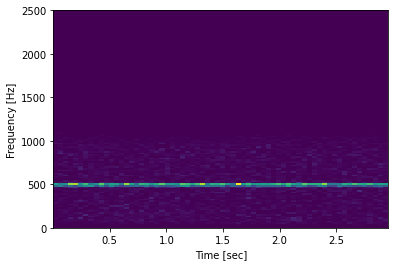

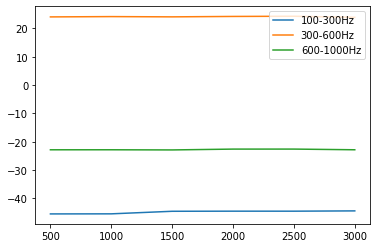

In [6]:
import masking_analysis.sound as sound
from masking_analysis.sound import Sound
from masking_analysis.masking import MaskingAnalyzer, masking_analyzer_from_exp_config_txt
import matplotlib.pyplot as plt

analyzer = masking_analyzer_from_exp_config_txt(
    './test_data/experiment_config_example.textproto')

analyzer.plot_signal_and_noise_spectrogram()
analyzer.plot_signal_excesses()

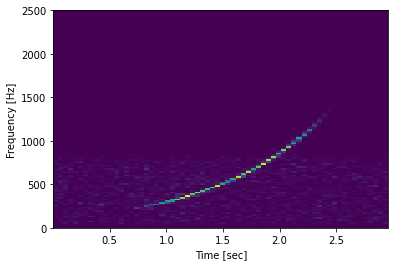

(0.0, 3000.0)

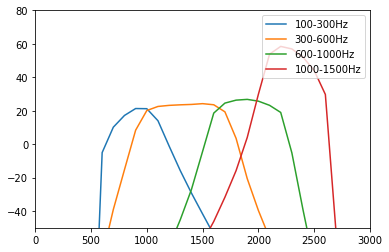

In [2]:
from masking_analysis.masking import masking_analyzer_from_exp_config_txt
import matplotlib.pyplot as plt

analyzer = masking_analyzer_from_exp_config_txt(
    './test_data/experiment_config_example_with_position.textproto')
analyzer.plot_signal_and_noise_spectrogram()
analyzer.plot_signal_excesses()

plt.ylim([-50,80])
plt.xlim([0,3000])

32767
[0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002, 0.0022, 0.0024, 0.0026, 0.0028, 0.003, 0.0032, 0.0034, 0.0036, 0.0038]
[0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002, 0.0022, 0.0024, 0.0026, 0.0028, 0.003, 0.0032, 0.0034, 0.0036, 0.0038]


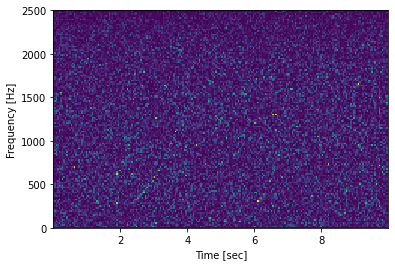

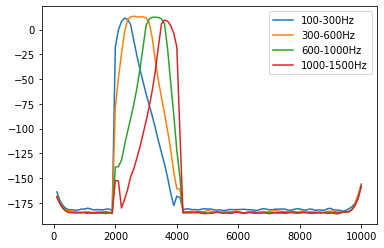

In [1]:
import masking_analysis.sound as sound
from masking_analysis.sound import Sound
from masking_analysis.masking import MaskingAnalyzer, masking_analyzer_from_exp_config_txt
import matplotlib.pyplot as plt

analyzer = masking_analyzer_from_exp_config_txt(
    './test_data/experiment_config_wav_noise_with_position.textproto')

analyzer.plot_signal_and_noise_spectrogram()
analyzer.plot_signal_excesses()